# LAB - 2  ASSESMENT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('my_data.csv')

In [3]:
print(data.shape)
data

(60, 3)


,Model Year,Model Name,Price (in INR)
0,2021,Apple,154000
1,2020,Apple,150000
2,2020,Apple,49000
3,2019,Apple,48000
4,2022,Apple,47000
5,2018,Apple,45000
6,2017,Apple,47000
7,2016,Apple,59999
8,2015,Apple,39999
9,2014,Apple,25000


## DATA PRE-PROCESSING

In [4]:
data1 = data

In [5]:
data1.dtypes

Model Year         int64
Model Name        object
Price (in INR)     int64
dtype: object

### One-Hot Encoding for Model Name

In [6]:
data1["Apple"] = pd.get_dummies(data["Model Name"])["Apple"]
data1["Lenovo"] = pd.get_dummies(data["Model Name"])["Lenovo"]
data1["Dell"] = pd.get_dummies(data["Model Name"])["Dell"]

In [7]:
data1.head(10)

,Model Year,Model Name,Price (in INR),Apple,Lenovo,Dell
0,2021,Apple,154000,1,0,0
1,2020,Apple,150000,1,0,0
2,2020,Apple,49000,1,0,0
3,2019,Apple,48000,1,0,0
4,2022,Apple,47000,1,0,0
5,2018,Apple,45000,1,0,0
6,2017,Apple,47000,1,0,0
7,2016,Apple,59999,1,0,0
8,2015,Apple,39999,1,0,0
9,2014,Apple,25000,1,0,0


### Dropping Model-name Column

In [8]:
data1 = data1.drop("Model Name",axis=1)

In [9]:
data1.head(10)

,Model Year,Price (in INR),Apple,Lenovo,Dell
0,2021,154000,1,0,0
1,2020,150000,1,0,0
2,2020,49000,1,0,0
3,2019,48000,1,0,0
4,2022,47000,1,0,0
5,2018,45000,1,0,0
6,2017,47000,1,0,0
7,2016,59999,1,0,0
8,2015,39999,1,0,0
9,2014,25000,1,0,0


## NOTE : 

    As One Hot-Encoding Doesn't work we use Indexing in-order to implement the Multi-linear regression
        1 - Apple
        2 - Lenovo
        3 - Dell

In [10]:
y= []
for i in range(len(data)):
    if(data["Model Name"][i]=="Apple"):
        y.append(1)
    elif (data["Model Name"][i] == "Lenovo"):
        y.append(2)
    else:
        y.append(3)

In [11]:
datax = pd.DataFrame(y, columns =['Model Name'])
x=datax.size
c=0
data["Model Name_opt"]=datax
while(c<x):
    data["Model Name_opt"].iloc[c]=datax["Model Name"].iloc[c]
    c=c+1

/var/folders/l1/rp1rrpyx24d84x0k_6p7pwgw0000gn/T/ipykernel_1538/3484846382.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Model Name_opt"].iloc[c]=datax["Model Name"].iloc[c]


## Dropping all columns except Model Year, Model Name_opt and Price

In [12]:
data = data.drop(["Model Name","Apple","Lenovo","Dell"],axis=1)

In [13]:
data.iloc[:,:3].head(10)

,Model Year,Price (in INR),Model Name_opt
0,2021,154000,1
1,2020,150000,1
2,2020,49000,1
3,2019,48000,1
4,2022,47000,1
5,2018,45000,1
6,2017,47000,1
7,2016,59999,1
8,2015,39999,1
9,2014,25000,1


## APPLYING LINEAR REGRESSION

### MULTILINEAR REGRESSION (HOT CODE)

In [14]:
class Regression:
    # To store the No of dependent variables 
    def __init__(self,no_of_vars):
        self.size = no_of_vars
        
    # For Printing the Equation
    def __str__(self):
        x = str(self.eq[0][0]) +" + "+str(self.eq[1][0])+"(x1)"+" + "+str(self.eq[2][0])+"(x2)"  
        return x
        
    # Assumption : Only the dependent and target variables are passed separately
    def fit(self,x1,x2,y):
        a = self.double_summation(x2,x2)
        b = self.double_summation(x1,y)
        c = self.double_summation(x1,x2)
        d = self.double_summation(x2,y)
        e = self.double_summation(x1,x1)
        f = c*c
        b1 = ((a*b)-(c*d))/((a*c)-(f))
        b2 = ((e*d)-(c*b))/((a*c)-(f))
        b0 = (y.sum()/self.size)-(b1*(x1.sum()/self.size))-(b2*(x2.sum()/self.size))
        arr = np.array([b0,b1,b2]);
        self.eq = arr
        return arr

    # This is an Helper Method 
    def double_summation(self,x1,x2):
        sumz = 0
        for i in range(self.size):
            sumz = sumz + (x1[i]*x2[i])
        return sumz
    
    # Assumption : Give me as Numbers not as a np-array
    def predict(self,x1,x2):
        return (self.eq[0]) + ((self.eq[1])*x1) + ((self.eq[2])*x2)    

In [15]:
y = np.array(data[["Price (in INR)"]])
x1 = np.array(data.drop(["Price (in INR)","Model Year"],axis=1))
x2 = np.array(data.drop(["Price (in INR)","Model Name_opt"],axis=1))

In [16]:
reg = Regression(len(y))
b0,b1,b2 = reg.fit(x1,x2,y)

In [17]:
reg.predict(x1[0],x2[0])[0]

48909.38133921818

In [18]:
print(reg)

48900.25848118811 + -0.976444119320599(x1) + 0.004997180677577198(x2)


### LINEAR REGRESSION (SK-LEARN METHOD)

[-2408220.06523652]
[[ 1227.48012331 -6393.77242915]]


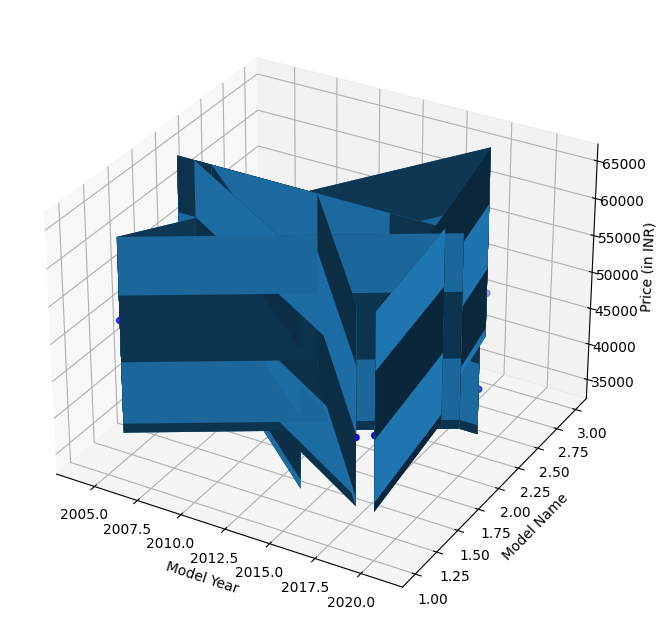

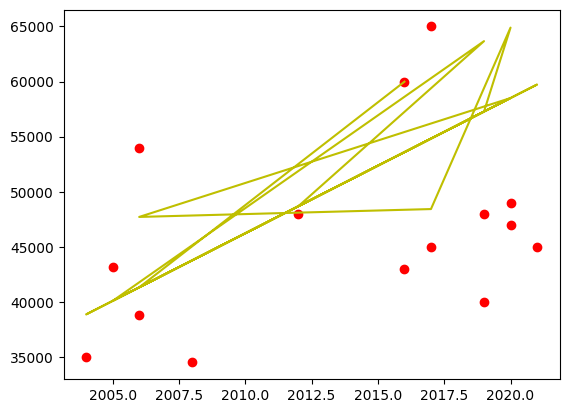

In [19]:
Y = data[["Price (in INR)"]]
X = data.drop("Price (in INR)",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state=10)

  
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.intercept_)
print(regr.coef_)
y_pred = regr.predict(X_test)

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], y_test, color='blue')
ax.plot_surface(X_test.iloc[:,0], X_test.iloc[:,1], y_pred)

ax.set_xlabel('Model Year')
ax.set_ylabel('Model Name')
ax.set_zlabel('Price (in INR)')

plt.show()



plt.scatter(X_test.iloc[:,0], y_test, color ='r')
plt.plot(X_test.iloc[:,0], y_pred, color ='y')

## APPLYING POLYNOMIAL REGRESSION 

20317.092767075083
0.34986862352994386


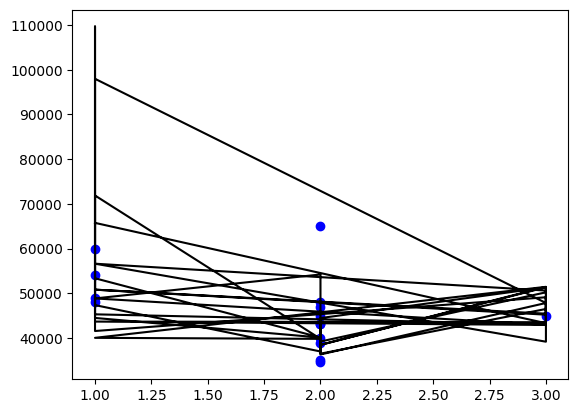

In [20]:
polynomial_features1 = PolynomialFeatures(degree=8)
x_poly1 = polynomial_features1.fit_transform(X_train)
model1 = LinearRegression()
model1.fit(x_poly1, y_train)
y_poly_pred1 = model1.predict(x_poly1)
rmse1 = np.sqrt(mean_squared_error(y_train,y_poly_pred1))
r21 = r2_score(y_train,y_poly_pred1)
print(rmse1)
print(r21)
plt.scatter(X_test.iloc[:,1], y_test, color ='b')
plt.plot(X_train.iloc[:,1], y_poly_pred1, color ='k')

## APPLYING LOGISTIC REGRESSION

### CLASS LABEL IMPUTATION

In [21]:
arr = ["Yes","No","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes","No","Yes","Yes"]

In [22]:
datax1 = pd.DataFrame(arr, columns =["Buying_Option"])
x=datax1.size
c=0
data["Buy_Option"]=datax1
while(c<x):
    data["Buy_Option"].iloc[c]=datax1["Buying_Option"].iloc[c]
    c=c+1

/var/folders/l1/rp1rrpyx24d84x0k_6p7pwgw0000gn/T/ipykernel_1538/1350753218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Buy_Option"].iloc[c]=datax1["Buying_Option"].iloc[c]


In [23]:
data.head(7)

,Model Year,Price (in INR),Model Name_opt,Buy_Option
0,2021,154000,1,Yes
1,2020,150000,1,No
2,2020,49000,1,Yes
3,2019,48000,1,No
4,2022,47000,1,Yes
5,2018,45000,1,Yes
6,2017,47000,1,No


In [24]:
data["Buy_Option"] = data["Buy_Option"].apply(lambda row : 1 if row=="Yes" else 0)

In [25]:
X = data.drop("Buy_Option",axis=1)
y = data.iloc[:,3:4]

### APPLYING THE LOGISTIC REGRESSION MODEL

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

y_pred = classifier.predict(xtest)

cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[ 0  2]
 [ 0 13]]
Accuracy :  0.8666666666666667


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### VISUALIZATION OF RESULTS

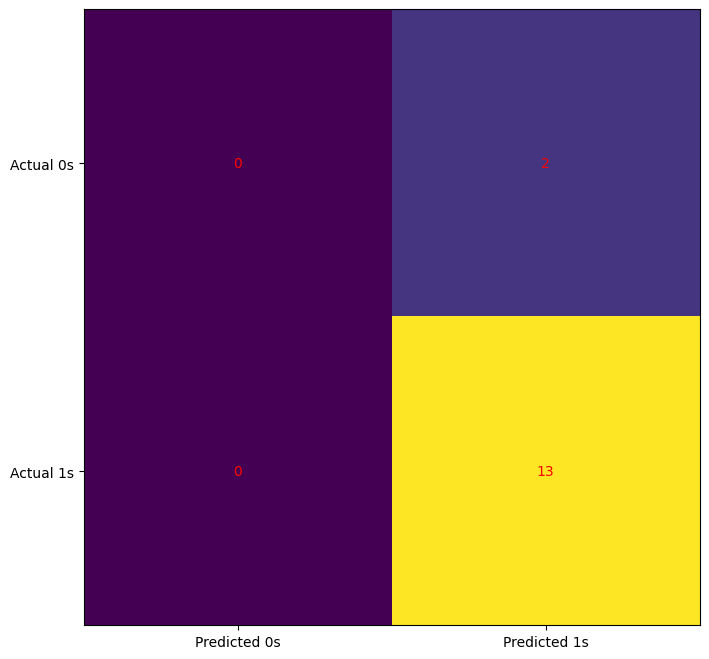

In [27]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()